In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [2]:
#多元模型与最小平方估計
df=pd.read_csv('./第四章例题数据/energy.txt',sep='\t') 
features = ["X1","X2","X3"]
labels = ["y"]
y=df[labels]
X = sm.add_constant(df[features])

model = sm.OLS(y, X)
result = model.fit()

print('Parameters: ', result.params)

Parameters:  const   -3.138636e+06
X1       1.595634e-01
X2       2.013211e+01
X3       1.070515e+04
dtype: float64


/Users/wenruiling/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [3]:
result.resid
result.predict()
y.values[:,0]-result.predict()

array([ 21394.85206288,  19402.2950939 ,   1700.31286883, -11657.5673357 ,
        -2318.34798496,  -6679.41968905, -15459.07553503, -23086.97601238,
        -7278.1380462 , -17229.76988838,  -7734.40785748,   1199.33708813,
         6650.0932928 ,   7192.29212045,  42951.70585541, -16396.95848786,
        -4719.97248948,   -373.91414314,   5719.10222414,   6724.55686317])

In [4]:
#回歸顯著性檢定
result.rsquared
result.rsquared_adj
result.ess            #SSR
result.ssr            #SSE
result.centered_tss   #SST

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           5.98e-14
Time:                        17:06:38   Log-Likelihood:                -220.73
No. Observations:                  20   AIC:                             449.5
Df Residuals:                      16   BIC:                             453.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.139e+06   2.32e+05    -13.556      0.000   -3.63e+06   -2.65e+06
X1             0.1596      0.031      5.231      0.000       0.095       0.224
X2            20.1321      1.386     14.523      0.000      17.194      23.071
X3          1.071e+04   2254.408      4.749      0.000    5926.020    1.55e+04
==============================================================================
Omnibus:                        7.291   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.676
Skew:                           1.019   Prob(JB):                       0.0965
Kurtosis:                       4.208   Cond. No.                     1.93e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#F檢定
print(result.f_test("X1=0"))

<F test: F=array([[27.36128006]]), p=8.24163127061717e-05, df_denom=16, df_num=1>


In [6]:
#t检验 
print(result.t_test("X1=0"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1596      0.031      5.231      0.000       0.095       0.224


In [7]:
#資料中心化及標準化
x1=df[features]
xbar=x1-x1.mean(axis=0)
ybar=y-y.mean(axis=0)
model2 = sm.OLS(ybar, xbar)
result2 = model2.fit()
print('Parameters: ', result2.params)

Parameters:  X1        0.159563
X2       20.132108
X3    10705.152140
dtype: float64


In [8]:
#對標準化資料做回歸
xstar=(x1-x1.mean(axis=0))/x1.std(axis=0)
ystar=(y-y.mean(axis=0))/y.std(axis=0)
model3 = sm.OLS(ystar, xstar)
result3 = model3.fit()
print('Parameters: ', result3.params)

Parameters:  X1    0.352462
X2    0.815948
X3    0.232416
dtype: float64


In [9]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              290.3
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                    8.51e-15
Time:                        17:09:15   Log-Likelihood:                          11.690
No. Observations:                  20   AIC:                                     -17.38
Df Residuals:                      17   BIC:                                     -14.39
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.3525      0.065      5.392      0.000       0.215       0.490
X2             0.8159      0.055     14.970      0.000       0.701       0.931
X3             0.2324      0.047      4.895      0.000       0.132       0.333
==============================================================================
Omnibus:                        7.291   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                4.676
Skew:                           1.019   Prob(JB):                       0.0965
Kurtosis:                       4.208   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

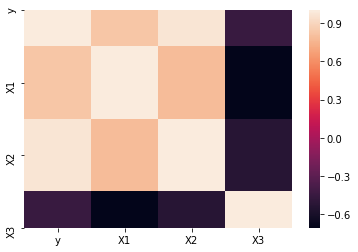

In [11]:
#相關与點散圖矩陣
f=[labels,features]
f=labels+features
d=df[f]
r=d.corr()
sns.heatmap(r)

In [12]:
from scipy.stats.stats import pearsonr
pearsonr(df['X1'],df['y']) #計算X1與y的相關係數並進行檢定

(0.8305023344098896, 5.824007888340452e-06)

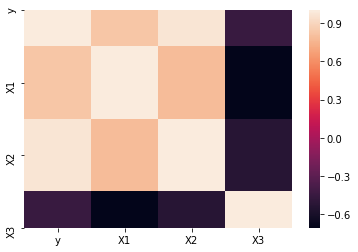

In [13]:
r1=df[features].corr()
r2=df.corr() 
sns.heatmap(r)

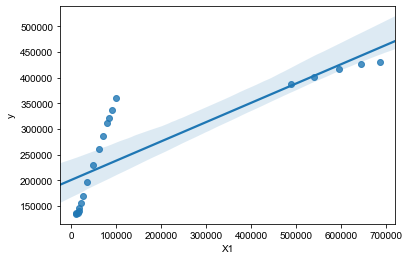

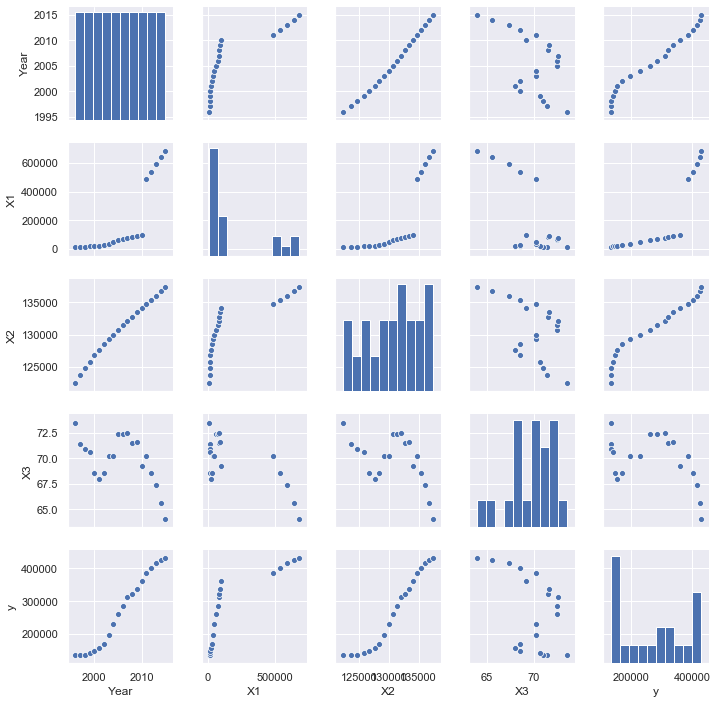

In [14]:
sns.regplot(df['X1'],df['y'])

#散點圖矩陣
sns.set()
sns.pairplot(df,height=2)